## Test of the Kan score predictor

In [1]:
import torch

def generate_dummy_data(x, seed=None):
    if seed is not None:
        torch.manual_seed(seed)
    
    # Step 1: Generate random output values between 1 and 5 for each sample
    outputs = torch.empty(x, 1).uniform_(1, 5)
    
    # Step 2: Create input array of shape [x, 5] with values around the mean of the outputs
    means = outputs.expand(-1, 5)
    inputs = torch.normal(mean=means, std=0.5)

    # Step 3: Scale the input values to be between 0 and 1
    inputs_min = inputs.min()
    inputs_max = inputs.max()
    scaled_inputs = (inputs - inputs_min) / (inputs_max - inputs_min) * 0.9 + 0.05
    
    return scaled_inputs, outputs


In [2]:

inputs, outputs = generate_dummy_data(10, seed=42)
inputs_test, outputs_test = generate_dummy_data(2, seed=42)
print("Outputs:\n", outputs)
print("Inputs:\n", inputs)


Outputs:
 tensor([[4.5291],
        [4.6600],
        [2.5315],
        [4.8372],
        [2.5618],
        [3.4036],
        [2.0263],
        [4.1746],
        [4.7631],
        [1.5327]])
Inputs:
 tensor([[0.6711, 0.6052, 0.6706, 0.5791, 0.6487],
        [0.7687, 0.8755, 0.7039, 0.9403, 0.6274],
        [0.5044, 0.3581, 0.4635, 0.2258, 0.4355],
        [0.8763, 0.7059, 0.7759, 0.6471, 0.7616],
        [0.0988, 0.2988, 0.1876, 0.2365, 0.3960],
        [0.4206, 0.4235, 0.4738, 0.4009, 0.5113],
        [0.0692, 0.3123, 0.3674, 0.1370, 0.2525],
        [0.6434, 0.7586, 0.5842, 0.7643, 0.7082],
        [0.9500, 0.7886, 0.8507, 0.7922, 0.6957],
        [0.0500, 0.1071, 0.1734, 0.1289, 0.1641]])


In [ ]:
import os

gpu_id = 4

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_id}"
device = torch.device("cuda")

In [ ]:
import torch
from score_predicter import ScoreCombiner

predictor = ScoreCombiner(42)

dataset = predictor.load_data("9hgq9cxd")

In [4]:
print(dataset['train_label'])

tensor([[4.5291],
        [4.6600],
        [2.5315],
        [4.8372],
        [2.5618],
        [3.4036],
        [2.0263],
        [4.1746],
        [4.7631],
        [1.5327]])


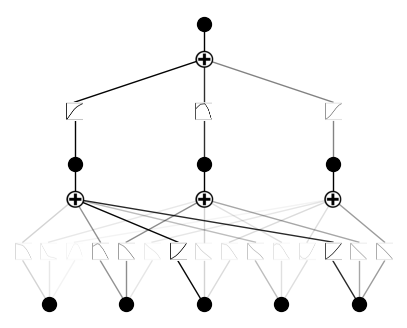

In [5]:
predictor(dataset['train_input'])

predictor.plot()
    

In [6]:
predictor.scoring_function.fit(dataset, opt="LBFGS", steps=50, lamb=0.001)

train loss: 3.58e-03 | test loss: 1.70e+00 | reg: 5.20e+00 : 100%|██| 50/50 [00:11<00:00,  4.50it/s]


{'train_loss': [array(0.0094261, dtype=float32),
  array(0.00567682, dtype=float32),
  array(0.00564848, dtype=float32),
  array(0.00409398, dtype=float32),
  array(0.00891108, dtype=float32),
  array(0.00908998, dtype=float32),
  array(0.00458819, dtype=float32),
  array(0.00636656, dtype=float32),
  array(0.0065675, dtype=float32),
  array(0.00693042, dtype=float32),
  array(0.00517713, dtype=float32),
  array(0.00360332, dtype=float32),
  array(0.0039503, dtype=float32),
  array(0.00510108, dtype=float32),
  array(0.00596818, dtype=float32),
  array(0.00563785, dtype=float32),
  array(0.00563574, dtype=float32),
  array(0.00563611, dtype=float32),
  array(0.00563614, dtype=float32),
  array(0.00563619, dtype=float32),
  array(0.27383026, dtype=float32),
  array(0.06763157, dtype=float32),
  array(0.00328417, dtype=float32),
  array(0.01083442, dtype=float32),
  array(0.00768138, dtype=float32),
  array(0.00582125, dtype=float32),
  array(0.00397151, dtype=float32),
  array(0.0046828

MultKAN(
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)


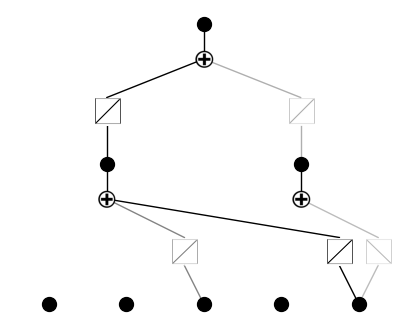

In [7]:
predictor.scoring_function = predictor.scoring_function.prune()
print(predictor.scoring_function)
predictor.scoring_function.plot("test2.png")

None


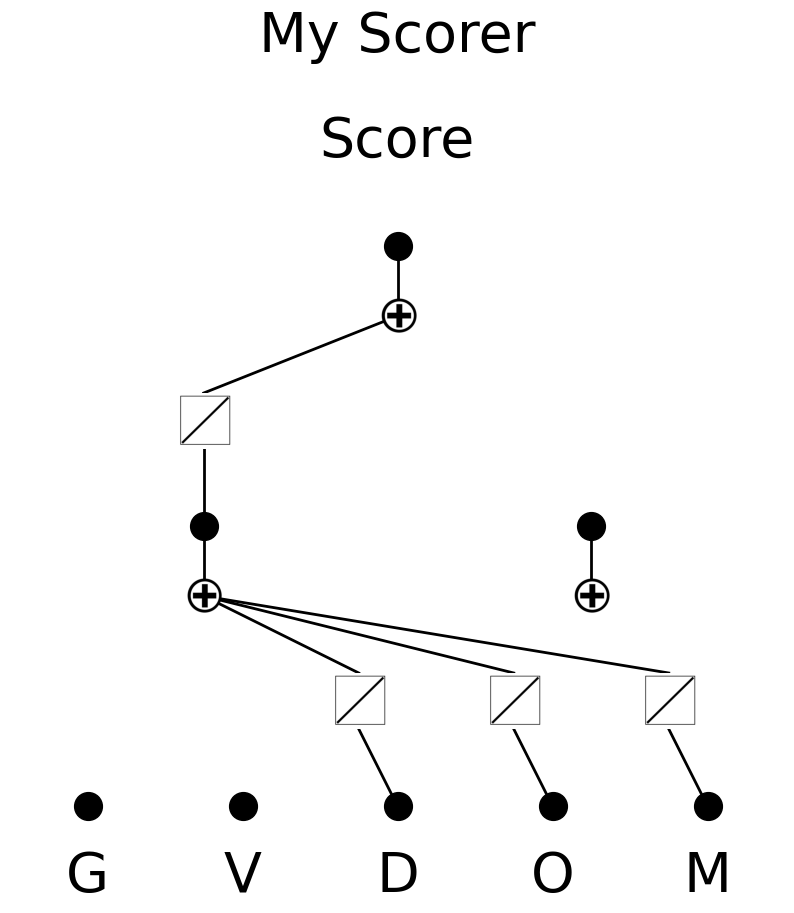

In [9]:
fig = predictor.scoring_function.plot(beta=200, in_vars=['G', 'V', 'D', 'O', 'M'], varscale=1,out_vars=['Score'], title = 'My Scorer', scale=1)
print(fig)

In [ ]:
import matplotlib.pyplot as plt

fig.savefig(f"Test_KAN.png")

AttributeError: 'NoneType' object has no attribute 'savefig'